## Comapring log P, MW and atom count of COCONUT and ZINC dataset

In [48]:
#Libraries
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import rdMolDescriptors as rdescriptors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*') 

In [49]:
#Loading zinc database from csv 
suppl_csv = pd.read_csv('../data/ZINCALL.csv', delimiter = ' ')
suppl_csv

,Smiles,zinc_id
0,N=C(N)NCC[C@H](N)C(=O)O,1589384
1,CN(C)CC(=O)NCC(=O)O,83822513
2,O=C(O)CN1CCCNS1(=O)=O,214763687
3,O=C(O)[C@@H]1C[C@H]2O[C@H]1[C@H](O)[C@H]2O,306392345
4,N[C@@H]1N=C2N=C(O)N=C2C(=O)N1,85343607
...,...,...
379017,Cc1ccc(C(=O)N(c2ccc(N(C(=O)c3ccc(C)cc3)S(=O)(=...,97986502
379018,CCc1c(-c2ccc(OC)c(OC)c2)nn(-c2nc(-c3ccc(C)cc3)...,97948800
379019,Cc1cc(N2CCN(CCOc3cccc4ccccc34)CC2)n2nc(C)c(-c3...,54274624
379020,CCOc1cc(CNc2cc(Cl)ccc2C)cc(I)c1OCc1ccccc1Cl,2093448


In [50]:
# List of Smiles of zinc products
ligandm_database = []
for ligand in suppl_csv["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))
        
#List of MW from csv
db_MW_z = []
for substance in ligandm_database:
		db_MW_z.append(rdescriptors.CalcExactMolWt(substance))
print(len(db_MW_z))

#List of logP from csv
db_logP_z = []
for substance in ligandm_database:
		db_logP_z.append(Descriptors.MolLogP(substance))
print(len(db_logP_z))

379022
379022


In [51]:
# List of Smiles of zinc products
ligandm_database = []
for ligand in suppl_csv["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))
        
zinc_atomcount = [l.GetNumHeavyAtoms() for l in ligandm_database]


In [52]:
#Creating dataframe of logP and MW value of ZINC products
df_ZINC = pd.DataFrame(data={'Smiles': suppl_csv['Smiles'], 'MW': db_MW_z,  'log P': db_logP_z, 'Atom count' : zinc_atomcount})
df_ZINC['Name'] = "ZINC"
df_ZINC

,Smiles,MW,log P,Atom count,Name
0,N=C(N)NCC[C@H](N)C(=O)O,160.096026,-1.72853,11,ZINC
1,CN(C)CC(=O)NCC(=O)O,160.084792,-1.25120,11,ZINC
2,O=C(O)CN1CCCNS1(=O)=O,194.036128,-1.38890,12,ZINC
3,O=C(O)[C@@H]1C[C@H]2O[C@H]1[C@H](O)[C@H]2O,174.052823,-1.41990,12,ZINC
4,N[C@@H]1N=C2N=C(O)N=C2C(=O)N1,167.044324,-1.87440,12,ZINC
...,...,...,...,...,...
379017,Cc1ccc(C(=O)N(c2ccc(N(C(=O)c3ccc(C)cc3)S(=O)(=...,636.051720,6.49784,42,ZINC
379018,CCc1c(-c2ccc(OC)c(OC)c2)nn(-c2nc(-c3ccc(C)cc3)...,604.229740,7.58732,44,ZINC
379019,Cc1cc(N2CCN(CCOc3cccc4ccccc34)CC2)n2nc(C)c(-c3...,511.213888,6.02074,37,ZINC
379020,CCOc1cc(CNc2cc(Cl)ccc2C)cc(I)c1OCc1ccccc1Cl,541.007232,7.49622,29,ZINC


In [53]:
#Loading zinc database from csv 
suppl_coco = pd.read_csv('../data/COCOALL.csv', delimiter = ' ')
suppl_coco

,Coconut_id,Smiles,MW,logP,Inchi,Inchi_s,Name
0,CNP0000002,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,660.183639,-2.08210,FJEMIESGEMWDOB-UHFFFAOYSA-N,FJEMIESGEMWDOB,COCO
1,CNP0000003,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,598.183897,3.63422,KLWKJVYCDFWQMK-UHFFFAOYSA-N,KLWKJVYCDFWQMK,COCO
2,CNP0000004,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,554.157682,3.32262,PTEKHLCNKCAXPH-UHFFFAOYSA-N,PTEKHLCNKCAXPH,COCO
3,CNP0000005,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,534.298139,6.87940,ZVAVQCZAGOKAMX-UHFFFAOYSA-N,ZVAVQCZAGOKAMX,COCO
4,CNP0000006,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,540.142032,3.01962,UYIPOCQHTAYRMA-UHFFFAOYSA-N,UYIPOCQHTAYRMA,COCO
...,...,...,...,...,...,...,...
405955,CNP0436851,COc1cccc2ccc(C(C)=O)c(O)c12,216.078644,2.75660,XNWOWNYWQOTWIX-UHFFFAOYSA-N,XNWOWNYWQOTWIX,COCO
405956,CNP0436852,COc1cc(OC)c2c(c1)C(OC)(c1ccc3c(c1O)C(=O)c1c(O)...,570.188983,4.77902,XWGVAZYMLDVIDS-UHFFFAOYSA-N,XWGVAZYMLDVIDS,COCO
405957,CNP0436853,CC1(C)C=Cc2cc(C3COc4c5c(cc(O)c4C3=O)OC(C)(C)C=...,420.157288,4.82510,XZXMEYSQXQNHCX-UHFFFAOYSA-N,XZXMEYSQXQNHCX,COCO
405958,CNP0436854,CCCCCCCC1CC(=O)NC(CO)C(=O)NC(CO)C(=O)N2CCCC2C(...,1183.685261,-1.20930,YNLIJTVZSFUHKP-UHFFFAOYSA-N,YNLIJTVZSFUHKP,COCO


In [54]:
suppl_coco.rename(columns = {'logP':'log P'}, inplace = True)
suppl_coco['Name'] = 'COCONUT'

In [55]:
suppl_coco.drop(['Inchi', 'Inchi_s', 'Coconut_id'], inplace=True, axis=1, errors='ignore')

In [56]:
# List of Smiles of zinc products
ligandm_database = []
for ligand in suppl_coco["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))
        
coco_atomcount = [l.GetNumHeavyAtoms() for l in ligandm_database]
suppl_coco["Atom count"] = coco_atomcount

In [57]:
suppl_coco

,Smiles,MW,log P,Name,Atom count
0,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,660.183639,-2.08210,COCONUT,45
1,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,598.183897,3.63422,COCONUT,44
2,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,554.157682,3.32262,COCONUT,41
3,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,534.298139,6.87940,COCONUT,39
4,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,540.142032,3.01962,COCONUT,40
...,...,...,...,...,...
405955,COc1cccc2ccc(C(C)=O)c(O)c12,216.078644,2.75660,COCONUT,16
405956,COc1cc(OC)c2c(c1)C(OC)(c1ccc3c(c1O)C(=O)c1c(O)...,570.188983,4.77902,COCONUT,42
405957,CC1(C)C=Cc2cc(C3COc4c5c(cc(O)c4C3=O)OC(C)(C)C=...,420.157288,4.82510,COCONUT,31
405958,CCCCCCCC1CC(=O)NC(CO)C(=O)NC(CO)C(=O)N2CCCC2C(...,1183.685261,-1.20930,COCONUT,84


In [58]:
joint_samples = pd.concat([suppl_coco, df_ZINC], ignore_index=True)
joint_samples

,Smiles,MW,log P,Name,Atom count
0,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,660.183639,-2.08210,COCONUT,45
1,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,598.183897,3.63422,COCONUT,44
2,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,554.157682,3.32262,COCONUT,41
3,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,534.298139,6.87940,COCONUT,39
4,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,540.142032,3.01962,COCONUT,40
...,...,...,...,...,...
784977,Cc1ccc(C(=O)N(c2ccc(N(C(=O)c3ccc(C)cc3)S(=O)(=...,636.051720,6.49784,ZINC,42
784978,CCc1c(-c2ccc(OC)c(OC)c2)nn(-c2nc(-c3ccc(C)cc3)...,604.229740,7.58732,ZINC,44
784979,Cc1cc(N2CCN(CCOc3cccc4ccccc34)CC2)n2nc(C)c(-c3...,511.213888,6.02074,ZINC,37
784980,CCOc1cc(CNc2cc(Cl)ccc2C)cc(I)c1OCc1ccccc1Cl,541.007232,7.49622,ZINC,29


In [59]:
plt.rcParams['font.size'] = '13'

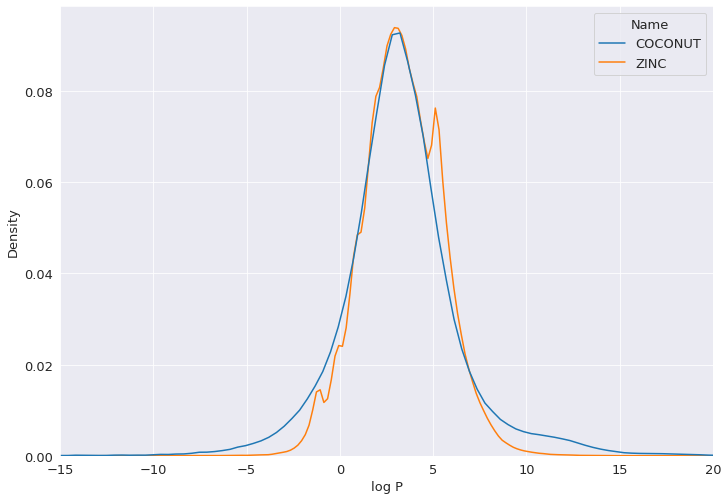

In [91]:
#Histogram of logP value of products
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data=joint_samples, x="log P", hue="Name")
plt.xlim(-15, 20);

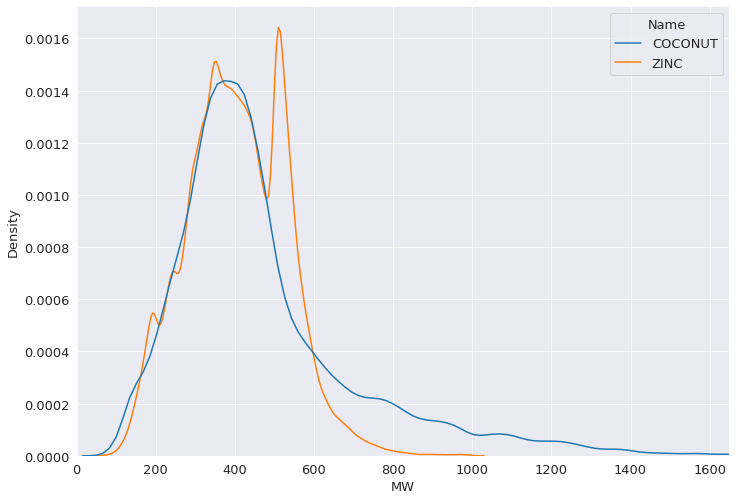

In [93]:
#Histogram of MW values of COCONUT and ZINC dataset
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data=joint_samples, x="MW", hue="Name")
plt.xlim(0, 1650);

# Atom count

<AxesSubplot:xlabel='Name', ylabel='Atom count'>

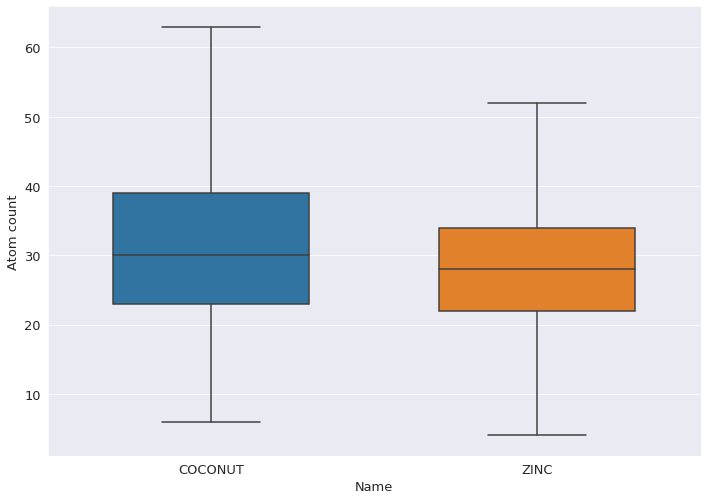

In [79]:
plt.rcParams['font.size'] = '13'
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=joint_samples, x="Name", y="Atom count", width= 0.6, showfliers = False)